*** Exercise 1: ***

Let's flip a coin 10 times. For each flip the propability of flipping heads is 1/2. We will denote the outcome of the nth throw by $X_n$. Thus if the event $\omega_0 \in \Omega$ occures we will get the sequence $(X_1(\omega_0), X_2(\omega_0), ..., X_{10}(\omega_0)) = (0,1,1,..,1)$

Let's define $Y_N = \sum_{k=1}^{N} X_k$ as the total number of heads thrown during the first N throws.

Create the event space as a list of tuples and solve the following exercises: (Tip: use itertools.product from the itertools package; additionally lets say you have a function that takes 3 arguments f(x,y,z) and you have a list of arguments arg = [1,2,3] you can then use * to unpack the list.)

```python
arg = [1,2,3]
f(*arg) # Evaluates the function at x = 1, y = 2 and z = 3 

```
1. Create a lambda expression for $P(Y_{10} = n)$ and plot the distribution (bar chart).
2. Calculate $E[Y_{10}] = \int_{\omega \in \Omega} dP(\omega) Y(\omega)$
3. Create a lambda expression for $P(Y_{10}=n|Y_k = n)$ and plot the distribution for 4 values of k (bar chart). Take a moment and think about the result.
4. Calculate $E[Y_{10}|Y_k = k]$ as a function of k and plot the result

In [2]:
import itertools
from matplotlib import pyplot as plt

rolls = 10

#My first try
poss_outcome = itertools.product('01', repeat=rolls)
event_space_j = [x for x in poss_outcome]

#Phil's code
elements = [[0,1]]*rolls
event_space = list(itertools.product(*elements))
event_space

/Users/johnsnyder/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


[(0, 0, 0, 0, 0, 0, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 0, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 0, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 0, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 0, 0, 1, 1, 1),
 (0, 0, 0, 0, 0, 0, 1, 0, 0, 0),
 (0, 0, 0, 0, 0, 0, 1, 0, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 0, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 0, 1, 1),
 (0, 0, 0, 0, 0, 0, 1, 1, 0, 0),
 (0, 0, 0, 0, 0, 0, 1, 1, 0, 1),
 (0, 0, 0, 0, 0, 0, 1, 1, 1, 0),
 (0, 0, 0, 0, 0, 0, 1, 1, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 0, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 0, 0, 1),
 (0, 0, 0, 0, 0, 1, 0, 0, 1, 0),
 (0, 0, 0, 0, 0, 1, 0, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 0, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 0, 1, 0, 1),
 (0, 0, 0, 0, 0, 1, 0, 1, 1, 0),
 (0, 0, 0, 0, 0, 1, 0, 1, 1, 1),
 (0, 0, 0, 0, 0, 1, 1, 0, 0, 0),
 (0, 0, 0, 0, 0, 1, 1, 0, 0, 1),
 (0, 0, 0, 0, 0, 1, 1, 0, 1, 0),
 (0, 0, 0, 0, 0, 1, 1, 0, 1, 1),
 (0, 0, 0, 0, 0, 1, 1, 1, 0, 0),
 (0, 0, 0, 0, 0, 1, 1, 1, 0, 1),
 (0, 0, 0,

[0.0009765625, 0.009765625, 0.0439453125, 0.1171875, 0.205078125, 0.24609375, 0.205078125, 0.1171875, 0.0439453125, 0.009765625, 0.0009765625]


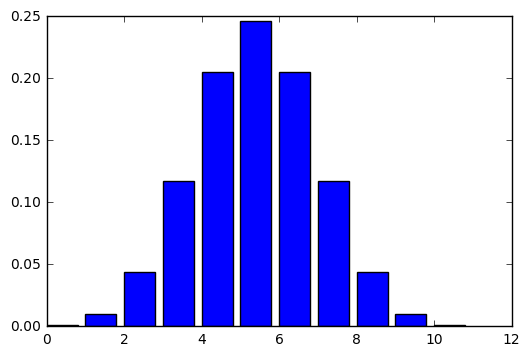

In [3]:
#1. Create a lambda expression for P(Y10=n) and plot the distribution (bar chart).
heads = lambda n: float(len([sum(x) for x in event_space if sum(x)==n]))/ float(len(event_space))

output = [heads(x) for x in range(0,11,1)]
print output
plt.bar(range(11),output)
plt.show()

In [4]:
#2. Calculate E[Y10]=∫ω∈ΩdP(ω)Y(ω)

expected_value = sum([heads(n)*n for n in range(11)])
expected_value



5.0

In [5]:
#3. Create a lambda expression for P(Y10=n|Yk=n) and plot the distribution for 4 values of k (bar chart).
# Take a moment and think about the result.
# Note - still wrapping head around the solution to this question.

flips_remain = lambda h, f: [(1./(2.**(10.-f))) for flip in range(10) if f >= h][f-h]

flips_remain(4,6)

#plotter = [flips_remain(x) for x in range(int(raw_input("Enter a value: ")))]
#plotter

#Solution code:
PCap = lambda k,n: sum([p for e in events if Y10(e) == n and Y(k,e) == n ])
Pcon = lambda k,n : 0 if PY(k,n) == 0 else PCap(k,n)/PY(k,n)
fig2, ax = plt.subplots(2,2)
fig2.subplots_adjust(wspace = 0.5, hspace = 0.5)
Pcon2 = [Pcon(2,N) for N in n]
Pcon5 = [Pcon(5,N) for N in n]
Pcon7 = [Pcon(7,N) for N in n]
Pcon9 = [Pcon(9,N) for N in n]
ax[0,0].bar(n,Pcon2, label ='k = 2')
ax[0,0].legend(fontsize = 'small')
ax[0,1].bar(n,Pcon5, label = 'k = 5')
ax[0,1].legend(fontsize = 'small')
ax[1,0].bar(n,Pcon7, label = 'k = 7')
ax[1,0].legend(fontsize = 'small')
ax[1,1].bar(n,Pcon9, label = 'k = 9')
ax[1,1].legend(fontsize ='small')

0.0625

In [ ]:
#Note - still wrapping head around the solution.

EYcon = lambda k: sum([Pcon(k,k)*Y(10,e) for e in events if Y(k,e) == k])
n = range(1,11)
EYconList = [EYcon(N) for N in n]
plt.bar(n,EYconList)
